<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


Connect to the database.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%204/master.db  
import sqlite3 
import pandas as pd  
conn = sqlite3.connect('master.db')  
cur = conn.cursor()    
QUERY = "SELECT * FROM master"  
# the read_sql_query runs the sql query and returns the data as a dataframe 
df = pd.read_sql_query(QUERY,conn) 
print(df.head())

--2023-05-08 16:11:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%204/master.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8691712 (8.3M) [binary/octet-stream]
Saving to: ‘master.db’

master.db           100%[===================>]   8.29M  37.3MB/s    in 0.2s    

2023-05-08 16:11:41 (37.3 MB/s) - ‘master.db’ saved [8691712/8691712]

   Respondent                      MainBranch Hobbyist  Age Age1stCode  \
0           1  I am a developer by profession      Yes   22         14   
1           2  I am a developer by profession      Yes   39         14   
2           3  I am a developer by p

Import pandas module.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df1 = pd.read_sql_query(QUERY,conn)
df1.head()

,COUNT(*)
0,4387


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,MASTER


## Demo: How to run a group by query


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


(array([4.094e+03, 1.060e+02, 3.600e+01, 2.900e+01, 2.200e+01, 3.900e+01,
        3.000e+00, 6.000e+00, 4.000e+00, 4.800e+01]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

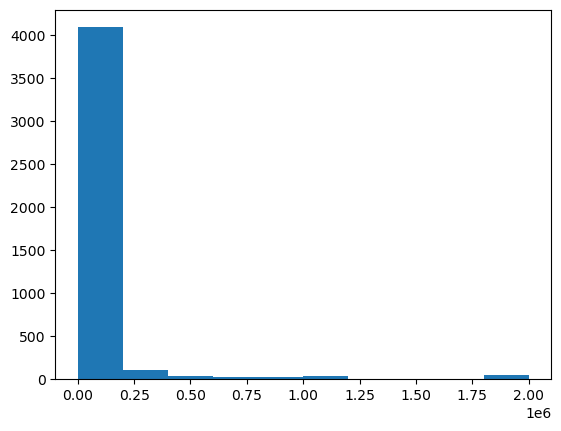

In [5]:
# your code goes here
plt.hist(df['ConvertedComp'])

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

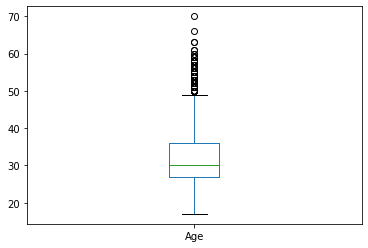

In [7]:
# your code goes here

df.boxplot(column =['Age'],grid=False) 

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

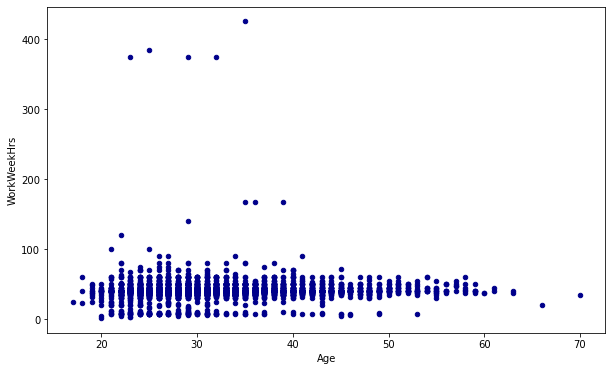

In [8]:
# your code goes here
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `Age`, use `Age` column as bubble size.

##### Hint: Use plotly.express to create a bubble chart


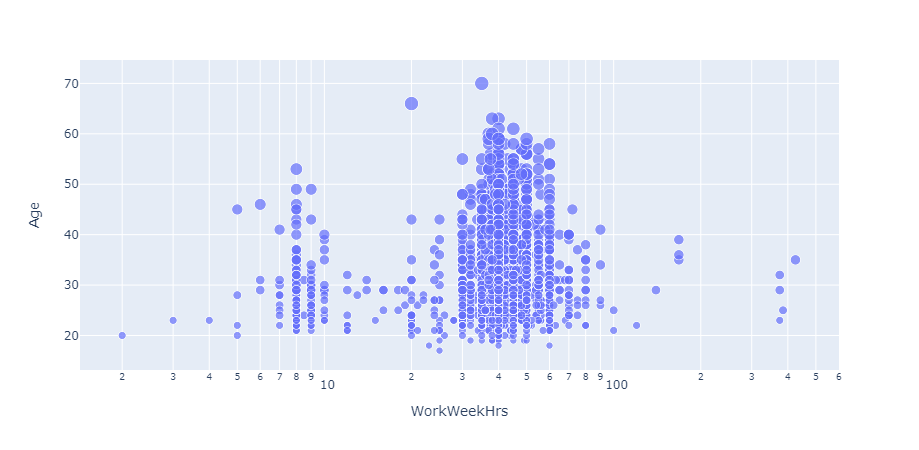

In [22]:
# your code goes here
import plotly.express as px
fig = px.scatter(df, x="WorkWeekHrs", y="Age",
         size="Age", log_x=True, size_max=10)
fig.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 Country that respondents filled the survey . Display percentages of each database on the pie chart. 


<AxesSubplot:ylabel='Country'>

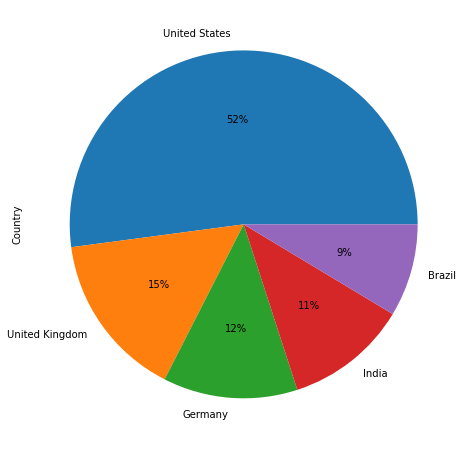

In [10]:
# your code goes here
df_pie = df['Country'].value_counts()
df_pie=df_pie.head(5)
df_pie.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%')

## Visualizing comparison of data


### Line Chart


Draw distribution plot for ConverteComp and plot the median

##### Hint: Use seaborn library for distribution plot


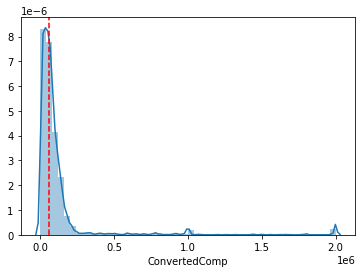

In [12]:
# your code goes here
import seaborn as sns
median=df['ConvertedComp'].median()
sns.distplot(df["ConvertedComp"])
plt.axvline(median, color='r', linestyle='--')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

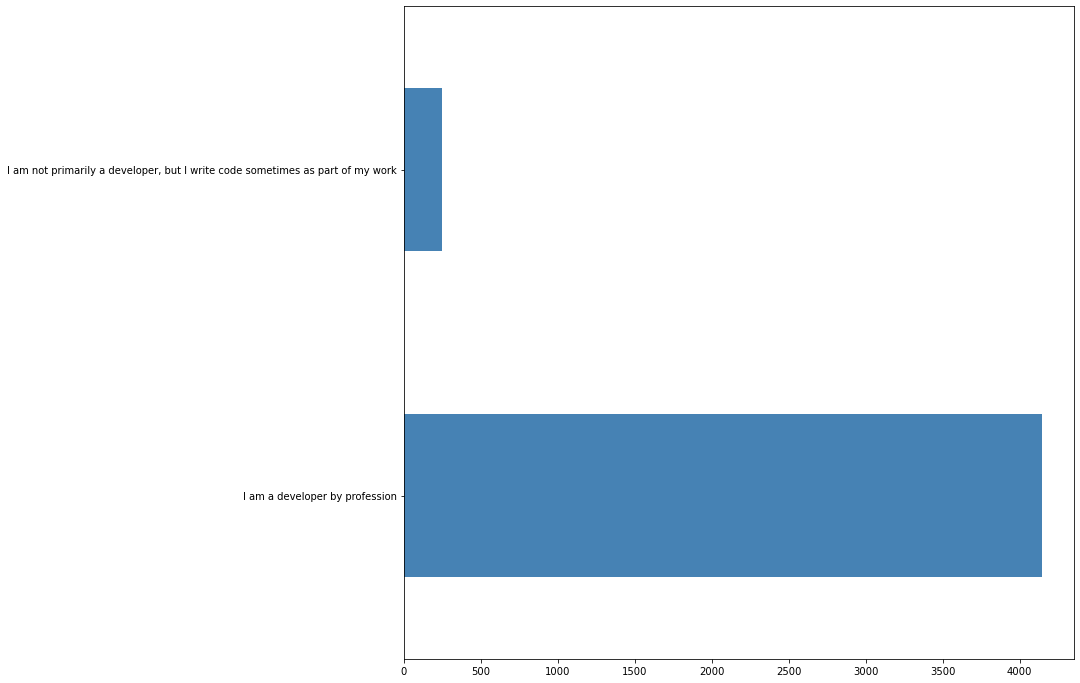

In [23]:
# your code goes here
df_mbranch = df['MainBranch'].value_counts()
df_mbranch
df_mbranch.plot(kind='barh', figsize=(12, 12), color='steelblue')


Close the database connection.


In [14]:
conn.close()